# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [82]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
df = pd.read_csv("C:\\Users\\kisor\\Downloads\\archive (4).zip")
df.head()
# Create a new dataframe from your CSV

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [83]:
# Print out any information you need to understand your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

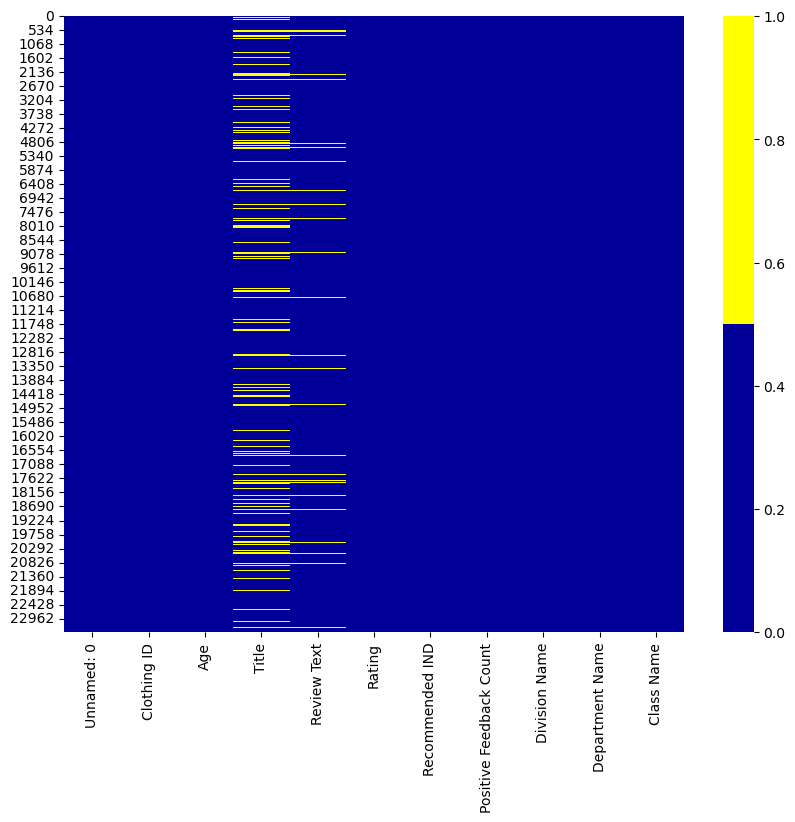

In [84]:
# Plot a heatmap of any missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [85]:
# Try out a missing data percentage list! 
pct_missing = df.isna().mean()
# pct_missing = df.isna().mean()*100
pct_missing[:10]

Unnamed: 0                 0.000000
Clothing ID                0.000000
Age                        0.000000
Title                      0.162224
Review Text                0.035979
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.000596
Department Name            0.000596
dtype: float64

<AxesSubplot:>

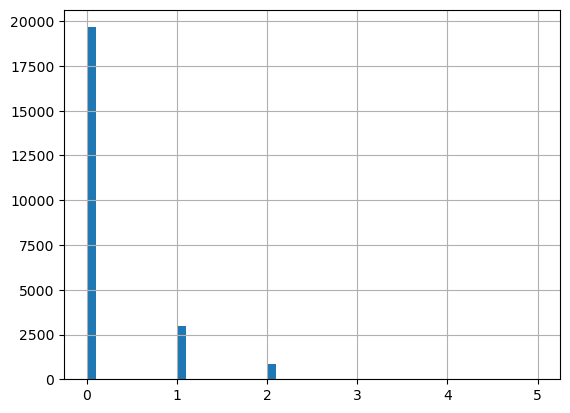

In [86]:
# Plot a missing data histogram
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [87]:
# Handle any missing data in your dataframe.
df_less_missing_cols = df.loc[:, pct_missing <= .0005].copy()
df_less_missing_cols.shape

(23486, 6)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

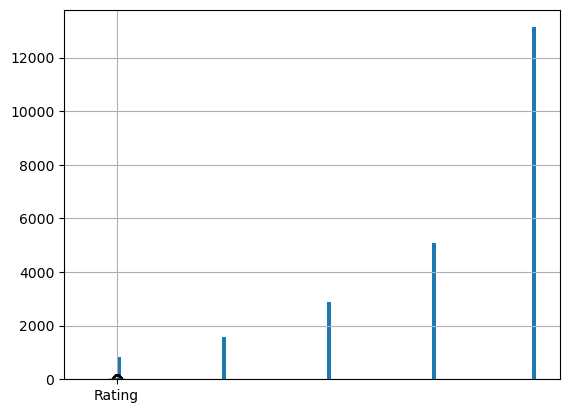

In [88]:
# Plot a histogram to see if there are any outliers.
df['Rating'].hist(bins=100)
# df.hist(bins=100)
df.boxplot(column=['Rating'])

In [89]:
# Use the describe() method
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


<AxesSubplot:>

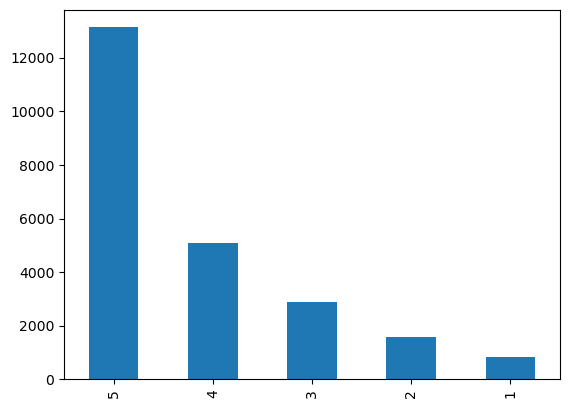

In [90]:
# Plot a bar chart
df['Rating'].value_counts().plot(kind='bar')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

<AxesSubplot:>

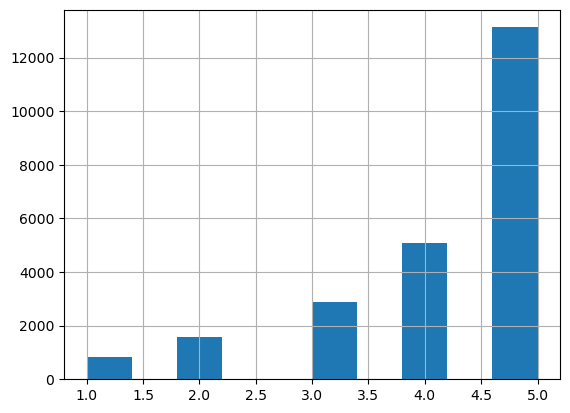

In [91]:
# Handle any outliers in your dataframe
df['Rating'].hist(bins=10)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [92]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df = df.drop("Age",axis='columns')
df

,Unnamed: 0,Clothing ID,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [93]:
# Look for duplicates. How will you handle any duplicates?
# Method 1
# df[df.duplicated()]
# df.drop_duplicates()
# Method 2
# df[df.drop(columns=['Rating']).duplicated()]
# df_dedupped = df.drop(columns=['Rating']).drop_duplicates()

# print(df.shape)
# print(df_dedupped.shape)
# There is no duplicates
key = ['Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name']

df_grouped = df.fillna(-999).groupby(key)['Rating'].count()
df_grouped[df_grouped > 1].shape
# 19 duplicate rows present

(19,)

In [96]:
key = ['Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)
# duplicate rows are removed

(23486, 10)
(22663, 10)


In [94]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# The age is not so important

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [97]:
# Try to convert all the strings in a column to lower or upper case. 
df2 = df.apply(lambda x: x.astype(str).str.lower())
df2

,Unnamed: 0,Clothing ID,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,nan,absolutely wonderful - silky and sexy and comf...,4,1,0,initmates,intimate,intimates
1,1,1080,nan,love this dress! it's sooo pretty. i happene...,5,1,4,general,dresses,dresses
2,2,1077,some major design flaws,i had such high hopes for this dress and reall...,3,0,0,general,dresses,dresses
3,3,1049,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,general petite,bottoms,pants
4,4,847,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,general,tops,blouses
...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,great dress for many occasions,i was very happy to snag this dress at such a ...,5,1,0,general petite,dresses,dresses
23482,23482,862,wish it was made of cotton,"it reminds me of maternity clothes. soft, stre...",3,1,0,general petite,tops,knits
23483,23483,1104,"cute, but see through","this fit well, but the top was very see throug...",3,0,1,general petite,dresses,dresses
23484,23484,1084,"very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,1,2,general,dresses,dresses
